# Etap 1

## 1. Wstęp
W raporcie została opisana analiza zbioru danych pt. „14,400 Classic Rock Tracks (with Spotify Data)”. Zbiór ten zawiera informacje o utworach klasycznego rocka, w tym dane dotyczące ich popularności oraz statystyki ze Spotify. Celem analizy jest identyfikacja trendów, charakterystyka utworów oraz zrozumienie, jak różne czynniki wpływają na ich odbiór przez słuchaczy.

## 2. Opis zbioru danych 
Analizowany zbiór danych obejmuje utwory klasycznego rocka wydane w latach 1962–2024. Zawiera on pełne dyskografie 94 artystów.
Zbiór danych składa się z 14 400 utworów, będących rekordami, pochodzących z 1 200 albumów. Każdy utwór jest opisany za pomocą 18 cech, obejmujących zarówno podstawowe informacje, takie jak tytuł, wykonawca, album oraz rok wydania, jak i cechy dźwiękowe pozyskane z platformy Spotify. 


## 3. Zbiór cech

#### 3.1 Cechy numeryczne
•	Duration – Długość utworu w sekundach <br>
•	Danceability – Wskaźnik taneczności (0–1) <br>
•	Energy – Poziom intensywności (0–1) <br>
•   Loudness – Głośność utworu (dB) <br>
•	Speechiness – Zawartość mówionych fragmentów (0–1) <br>
•	Acousticness – Ilość dźwięków akustycznych (0–1) <br>
•	Instrumentalness – Prawdopodobieństwo, że utwór jest instrumentalny (0–1) <br>
•	Liveness – Wskaźnik występu na żywo (0–1) <br>
•	Valence – Poziom pozytywności utworu (0–1) <br>
•	Tempo – Szybkość utworu w BPM <br>
•	Popularity – Wskaźnik popularności utworu <br>


#### 3.2 Cechy kategoralne
•  Track – Tytuł utworu<br>
•  Artist – Nazwa wykonawcy<br>
•  Album – Album, na którym znajduje się utwór<br>
•  Year – Rok wydania albumu<br>
•  Key – Tonacja utworu (0-11, gdzie 0 = C)<br>
•  Mode – Tryb utworu (durowy/molowy)<br>
•  Time_Signature – Metrum utworu (np. 4/4, 3/4)<br>



## 4. Dane statystyczne 

#### 4.1 Numeryczne

In [1]:
from utils.load_data import load_data
from stats.plot_creator import create_plot_errorbars, create_displot, create_heatmap, create_boxplot, create_regplot, create_violinplot
from stats.project_statistics import get_numeric_stats, generate_statistic_from_file_path
import matplotlib.pyplot as plt
%matplotlib inline

numerical_df, categorical_df = generate_statistic_from_file_path("UltimateClassicRock.csv", "UltimateClassicRock.csv")
numerical_df

,attribute,count,mean,std,min,5%,50%,95%,max,missing_values
0,Duration,14418.0,4.340000,1.735229,0.066667,2.333333,4.133333,6.916667,33.633333,0
1,Danceability,14418.0,0.503063,0.142619,0.000000,0.262850,0.509000,0.730000,0.987000,0
2,Energy,14418.0,0.656563,0.229607,0.000000,0.231000,0.690500,0.956000,0.998000,0
3,Loudness,14418.0,-9.438675,4.179623,-60.000000,-16.577300,-8.810500,-4.040700,-0.203000,0
4,Speechiness,14418.0,0.051354,0.046291,0.000000,0.026900,0.039000,0.110000,0.952000,0
5,Acousticness,14418.0,0.226924,0.268857,0.000000,0.000274,0.104000,0.821000,0.995000,0
6,Instrumentalness,14418.0,0.089682,0.215783,0.000000,0.000000,0.000737,0.716000,0.992000,0
7,Liveness,14418.0,0.210653,0.180537,0.000000,0.055500,0.140000,0.616000,1.000000,0
8,Valence,14418.0,0.528818,0.243557,0.000000,0.136000,0.529000,0.921000,0.991000,0
9,Tempo,14418.0,122.641620,27.940743,0.000000,79.735850,121.859000,174.562450,238.895000,0


Dane przedstawiają podstawowe statystyki opisowe dla cech numerycznych w zbiorze utworów muzycznych. Obejmują one średnie (arytmetyczna, mediana), odchylenie standardowe, rozkład wartości (min, max, percentyle) oraz liczbę brakujących danych. Pozwalają one na wstępną analizę utworów, identyfikację wartości odstających oraz ocenę kompletności danych.

#### 4.2 Kategoralne

In [2]:
categorical_df

,attribute,unique_classes_amount,missing_values,class_proportions
0,Track,13328,0,"{'Tumbling Dice - Live': 0.05548619780829519, ..."
1,Artist,94,0,"{'Bob Dylan': 3.148841725620752, 'Elton John':..."
2,Album,1247,0,"{'Fleetwood Mac': 0.24275211541129144, 'Brave ..."
3,Year,63,0,"{1974: 3.4262727146622276, 1976: 3.35691496740..."
4,Time_Signature,5,0,"{4: 91.71868497711195, 3: 7.032875572201415, 5..."
5,Key,12,0,"{9: 16.43085032598141, 2: 15.83437369954224, 7..."
6,Mode,2,0,"{1: 73.01290054099043, 0: 26.987099459009574}"


<p> Dane przedstawiają statystyki dotyczące cech kategorycznych w zbiorze utworów muzycznych. Zawierają liczbę unikalnych klas, brakujące wartości oraz proporcje występowania poszczególnych kategorii. Pozwalają one analizować różnorodność wykonawców, albumów, lat wydania oraz cech muzycznych, takich jak metrum i tryb, co może być przydatne do identyfikacji dominujących trendów i struktury danych. </p>

#### 4.3 Błędy pomiarowe, odchylenie standardowe

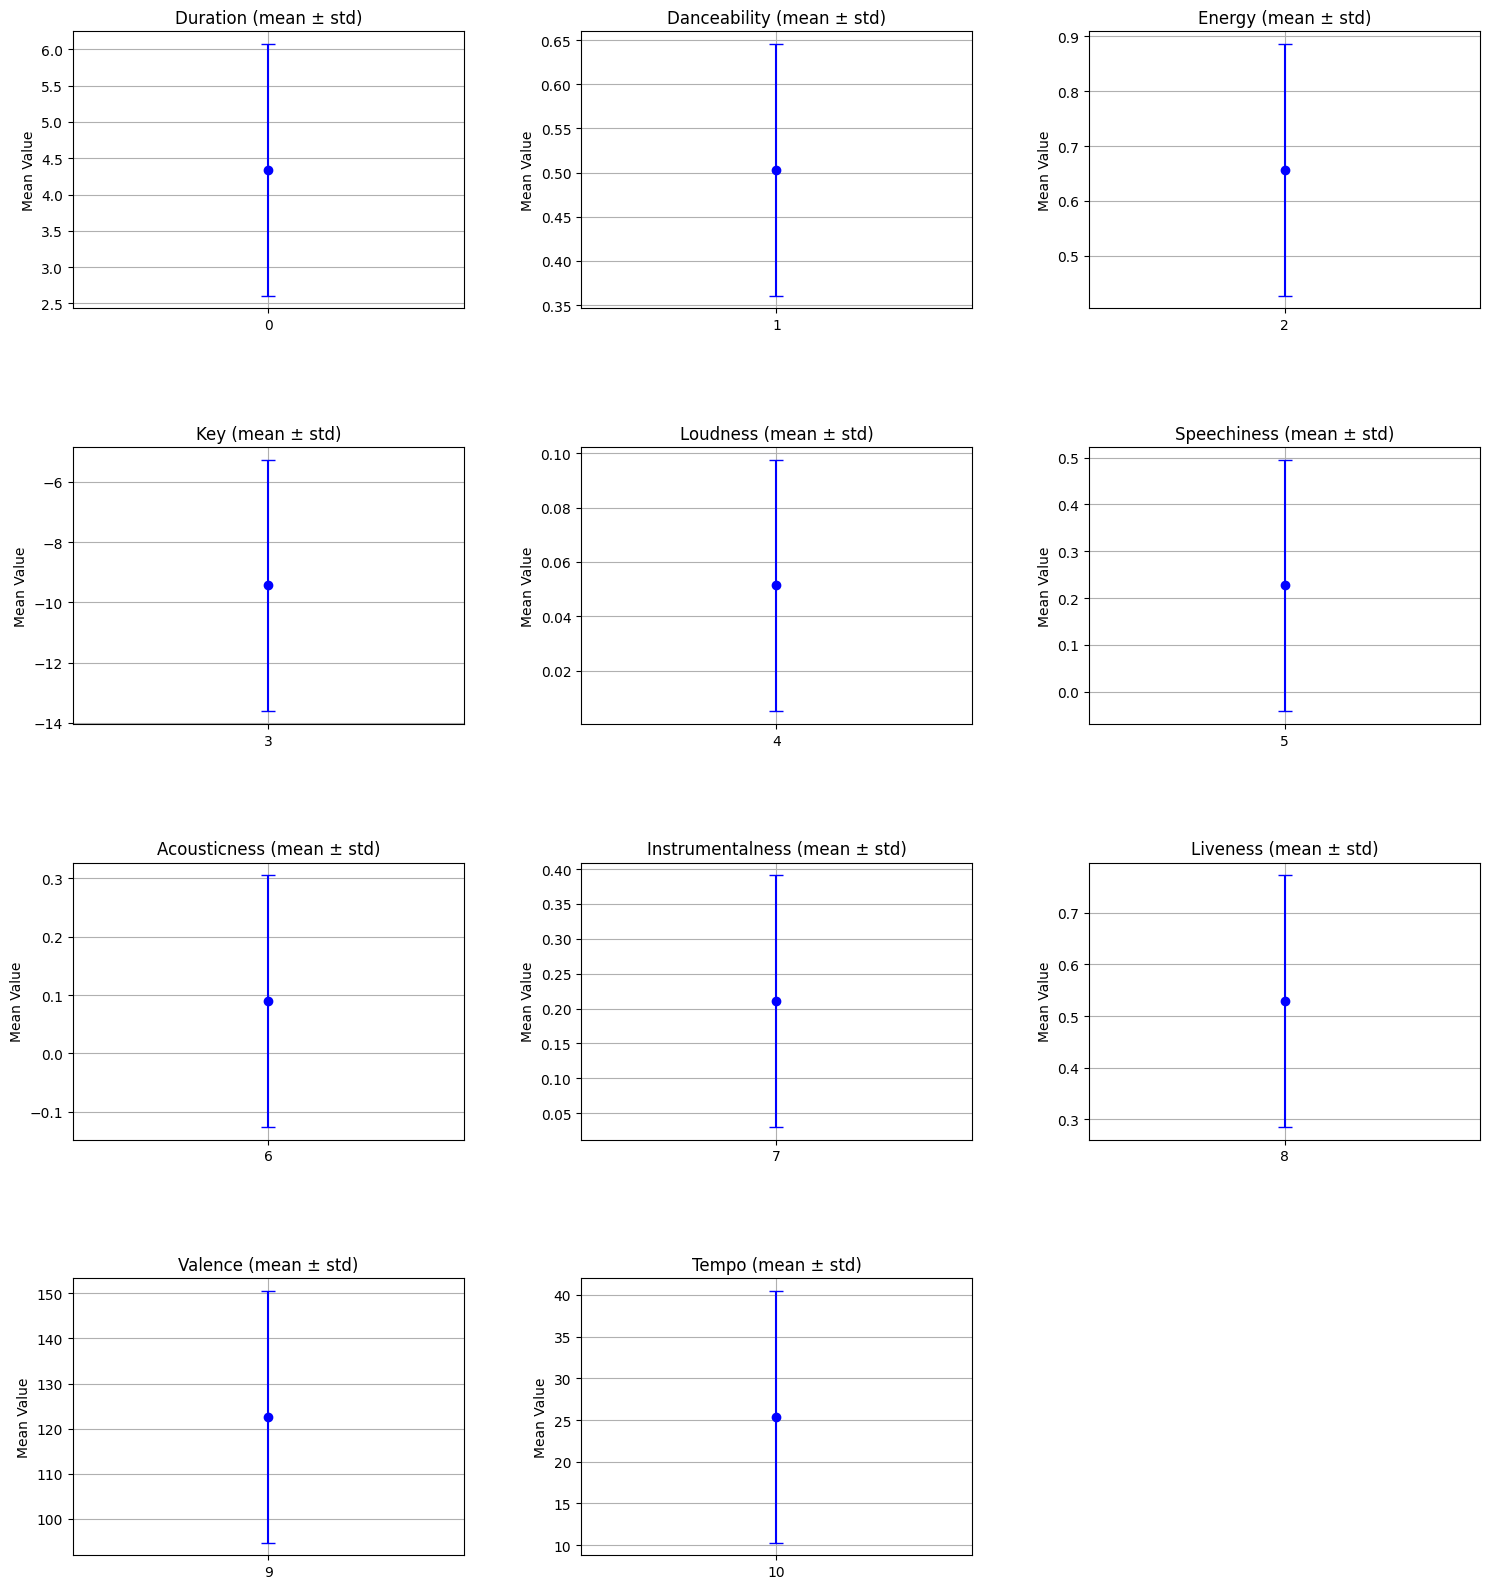

In [3]:
create_plot_errorbars(get_numeric_stats())

## 5. Wykresy

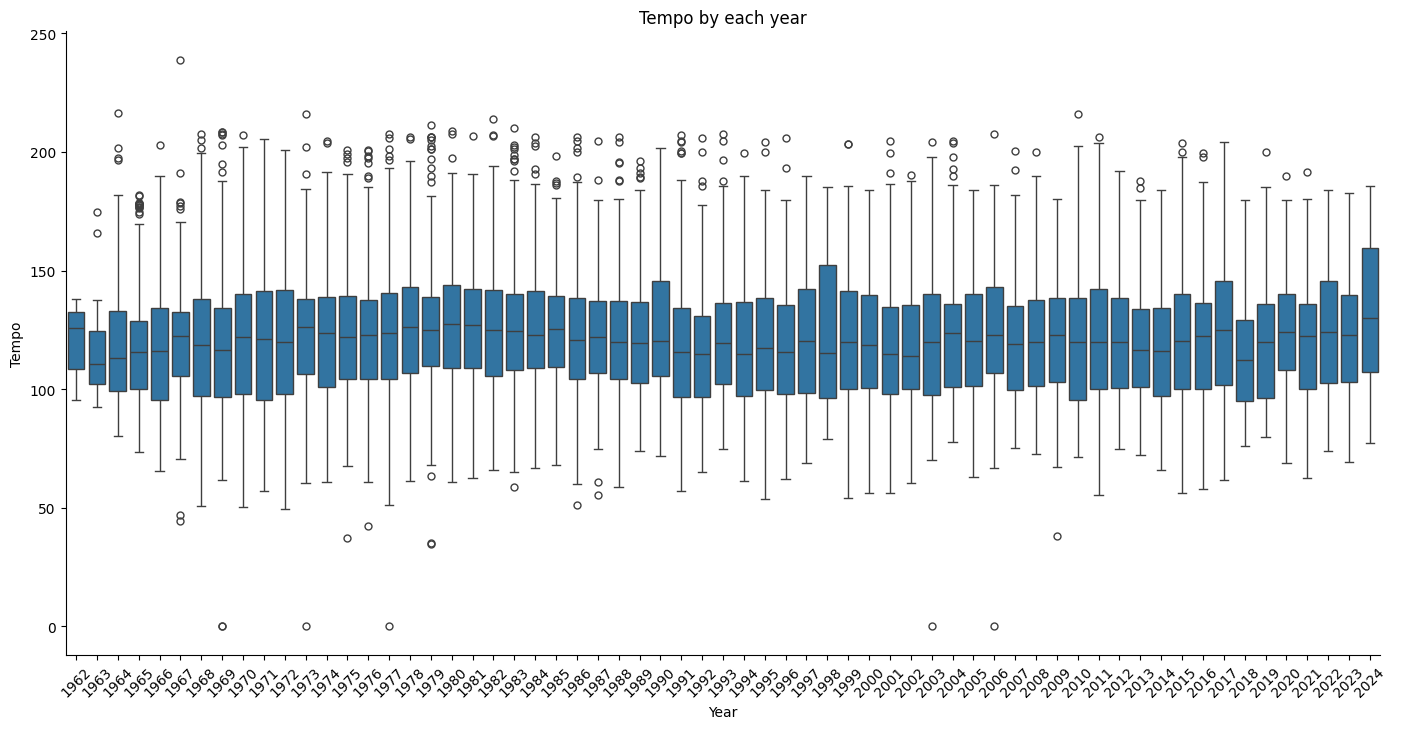

In [4]:
df = load_data("UltimateClassicRock.csv")
create_boxplot(df, "Year", "Tempo", "Tempo by each year")

<p>Jak można zaobserwować na powyższym wykresie średnie tempo hitowych piosenek rockowych było podobne od początków tego gatunku, jednakże warto zwrócić uwagę na dużą ilość rekordów przekraczających średnie oraz odchylenie standardowe w latach 80 i 90, w których grało się bardziej ekstremalne odmiany rocka. </p>

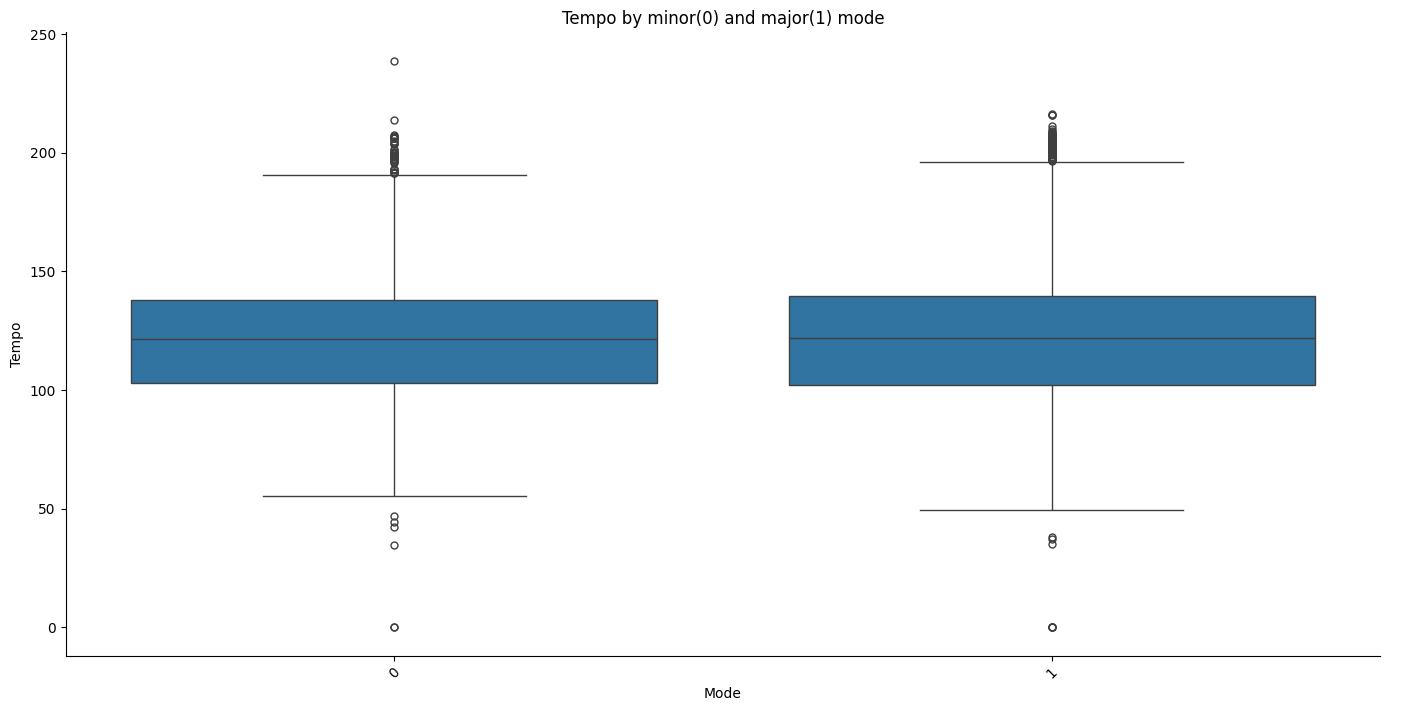

In [5]:
create_boxplot(df, "Mode", "Tempo", "Tempo by minor(0) and major(1) mode")

<p> Większość ludzi może kojarzyć piosenki w durze (szczęśliwe) jako te szybszem lecz jak się okazuje zarówno te smutne jak i pozytywne są podobnej szybkości </p>

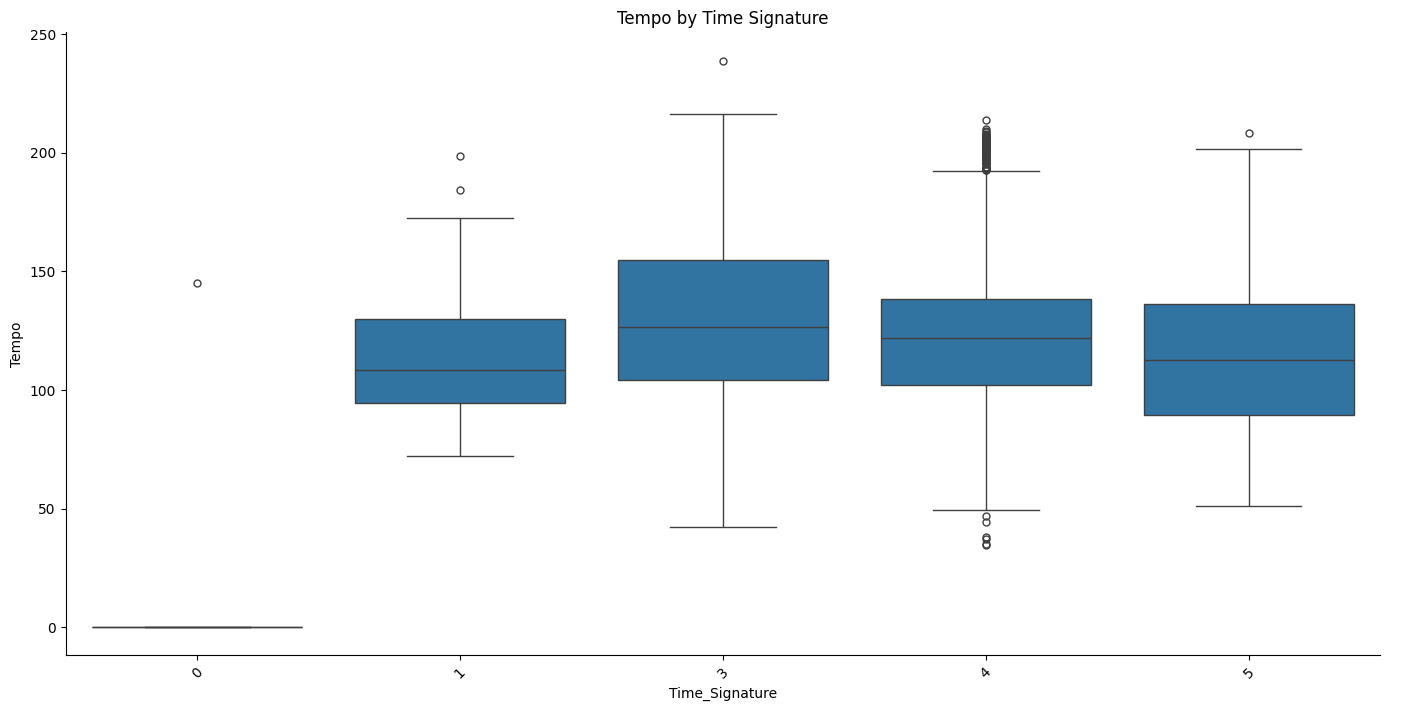

In [6]:
create_boxplot(df, "Time_Signature", "Tempo","Tempo by Time Signature")

<p>Jak widać utwory w sygnaturze 3/4 są zazwyczaj tymi szybszymi, może to wynikać już z samego faktu, że jeżeli są w niestandardowym metrum mogą być bardziej zaawansowane. </p>

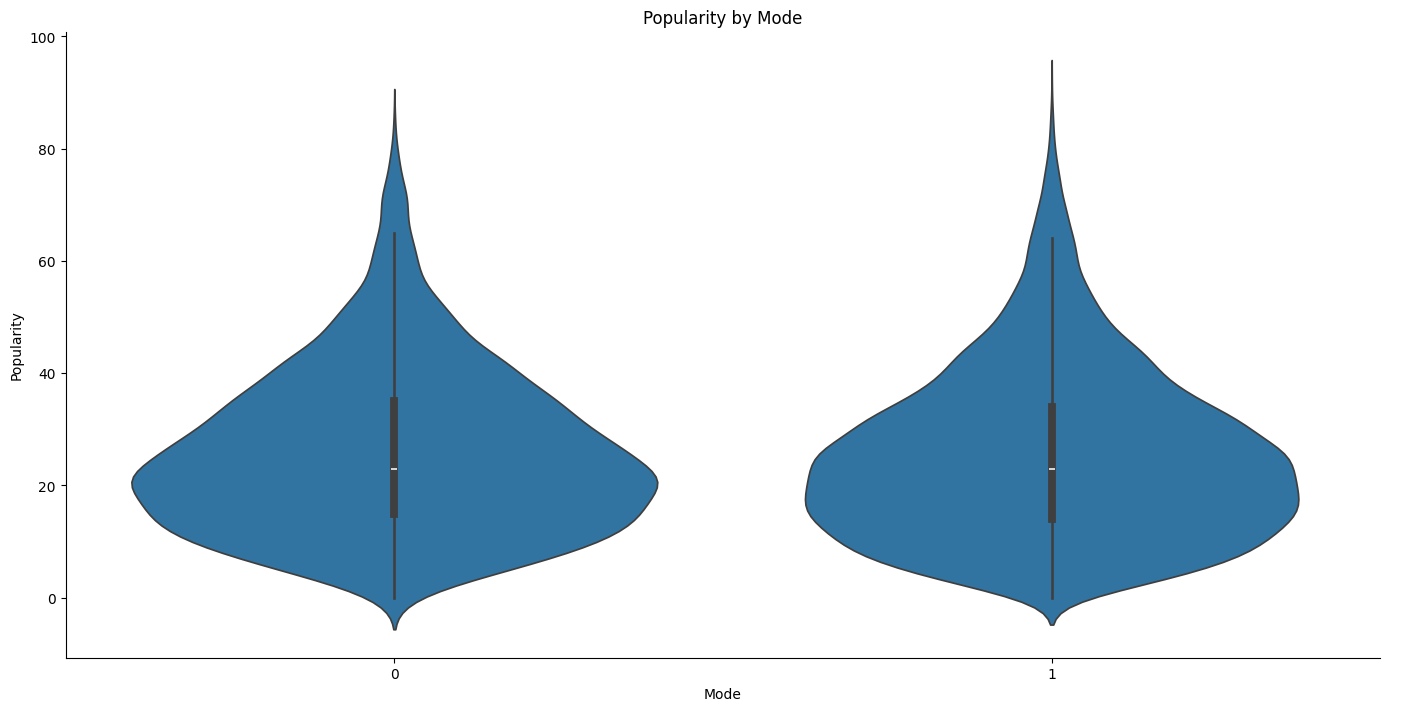

In [7]:
create_violinplot(df, "Mode", "Popularity", "Popularity by Mode")

Zarówno piosenki mollowe i durowe cieszą się podobnym zainteresowaniem wśród słuchaczy.

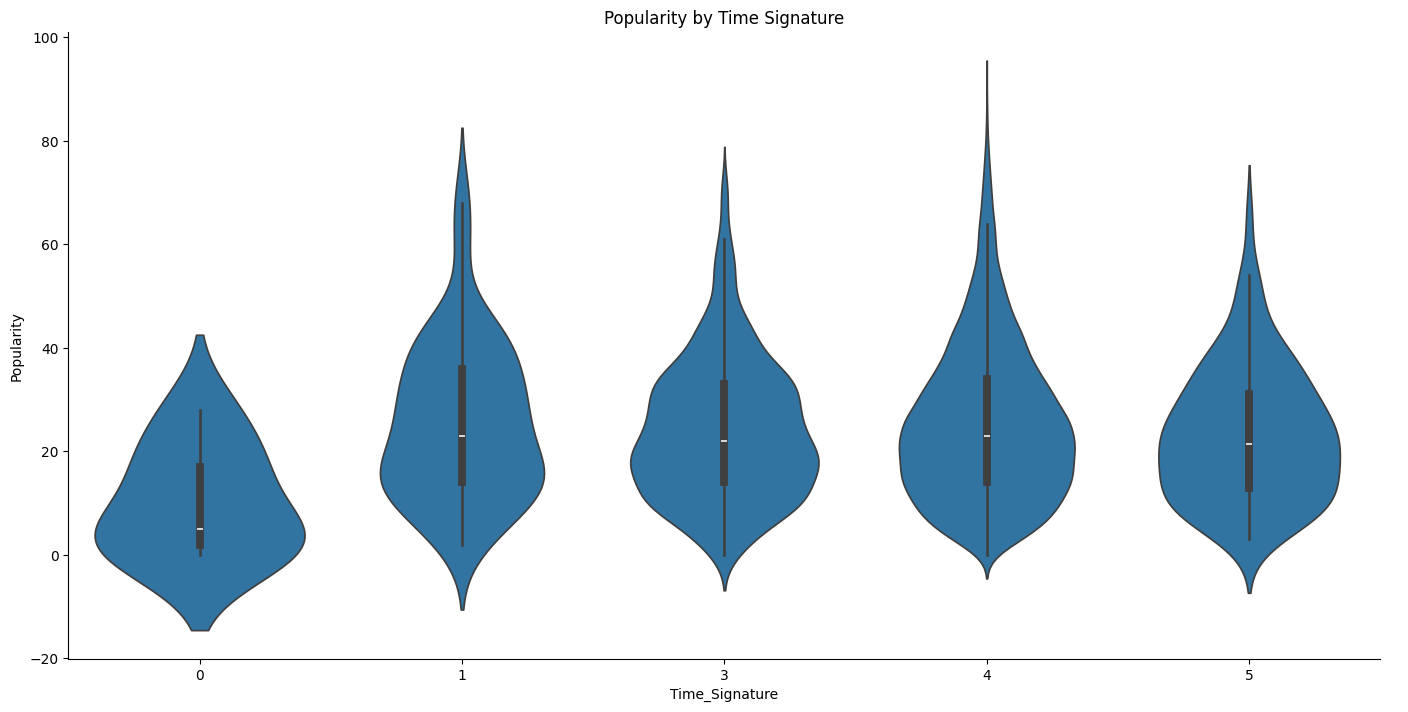

In [8]:
create_violinplot(df, "Time_Signature", "Popularity", "Popularity by Time Signature")

Spodziewanie łatwo zauważyć, że metrum 4/4 cieszy się największą popularnością wśród słuchaczy, ponieważ jest najłatwiejsze w odbiorze

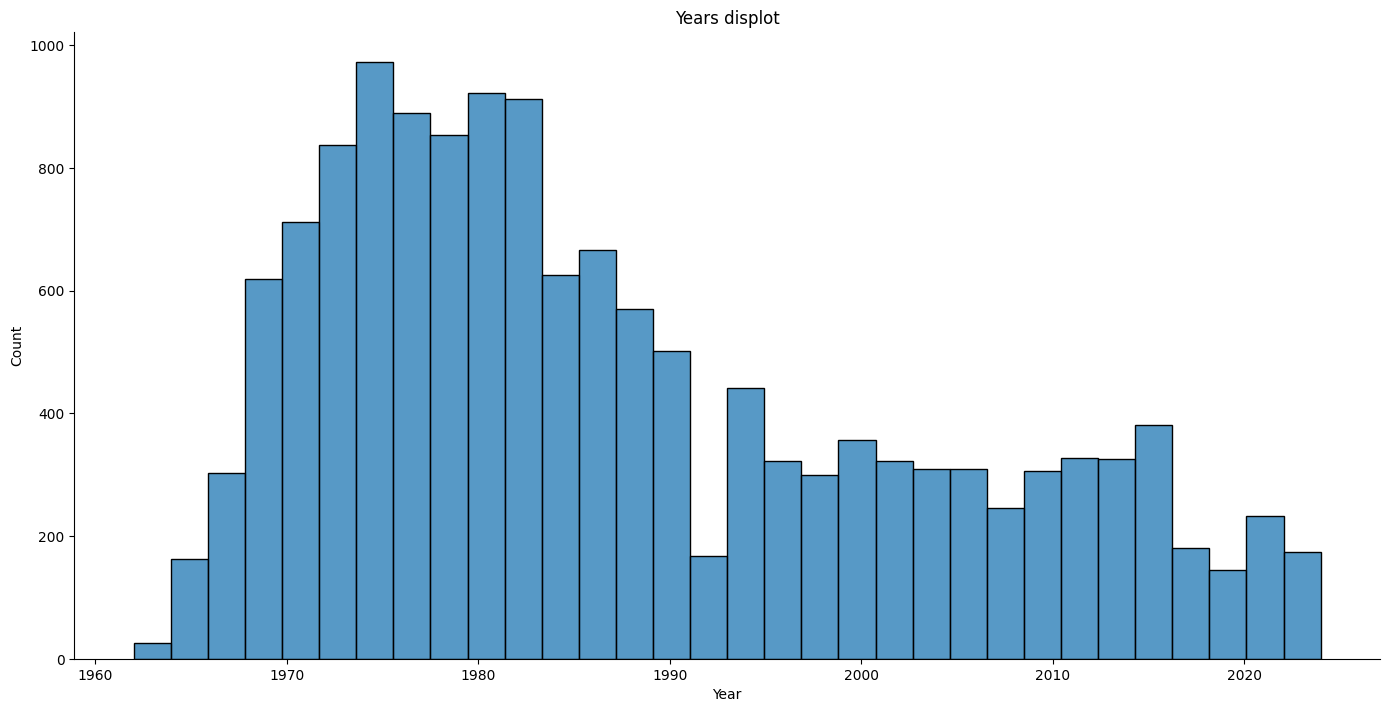

In [9]:
create_displot(df, "Year", "Years displot")

Można zauważyc, że lata 1970-1990 były złotym czasem dla rocka, powstało wówczas najwięcej znamienitych utworów

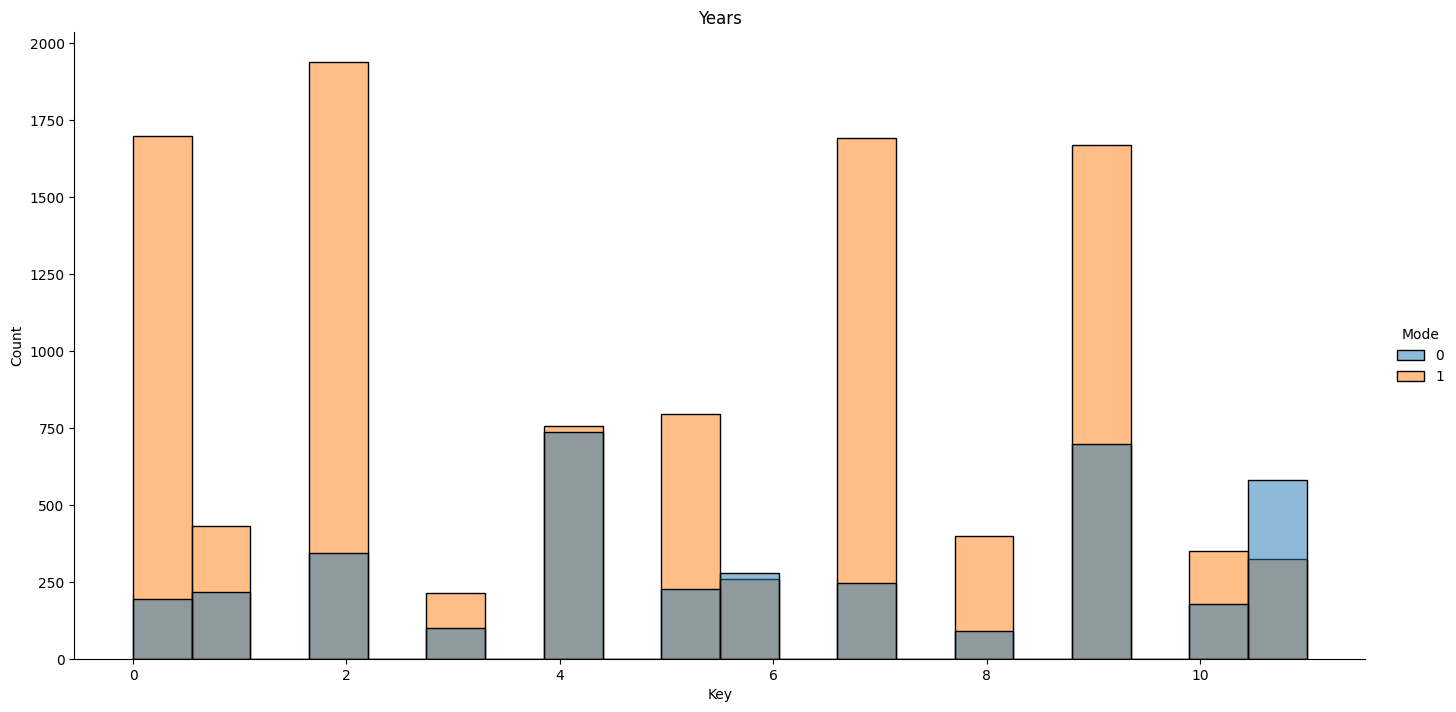

In [10]:
create_displot(df, "Key", "Years", hue="Mode")

Widzimy, że do najpopularniejszych kluczy należą klucze C(0), D(2), E(4), A(9) co zgadza się z ogólna teorią muzyki oraz strojeniem gitary, co ciekawe możemy zaobserwować, że jeżeli ogólnie przeważa tryb durowy, dla klucza B(11) przeważa mollowy, ponieważ B jest najsmutniejszym ze wszystkich kluczy i idealnie wpasowuje się w melancholijne utwory.

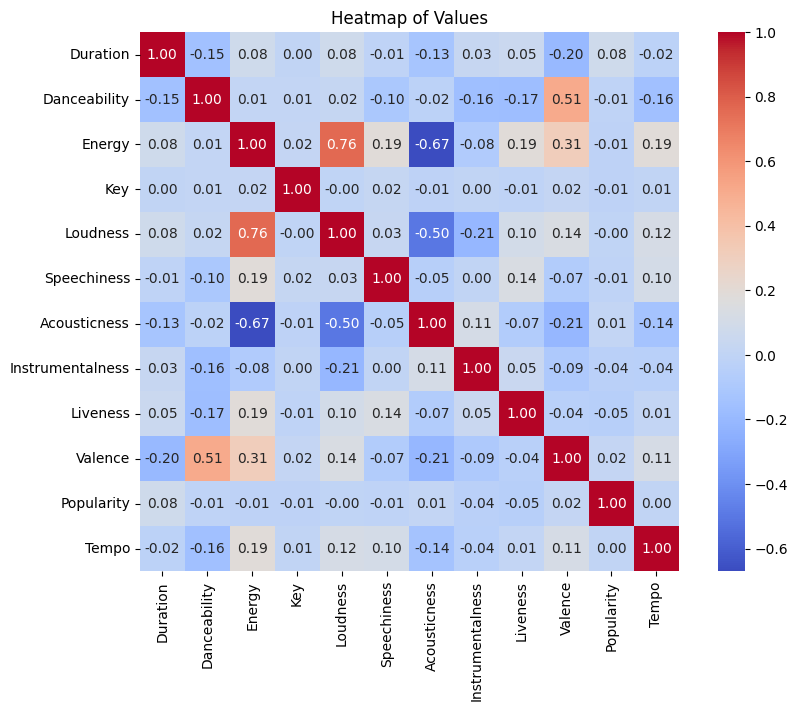

In [11]:
numeric_columns = ["Duration", "Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Popularity", "Tempo"]
create_heatmap(df, numeric_columns)

### **Analiza heatmapy korelacji cech**  

Heatmapa przedstawia macierz korelacji pomiędzy różnymi cechami zestawu danych. Wartości korelacji mieszczą się w zakresie od **-1** (silna korelacja ujemna) do **1** (silna korelacja dodatnia). Oto kluczowe obserwacje:  

#### **1. Silne korelacje dodatnie (blisko 1, oznaczone na czerwono)**  
- **Loudness – Energy (0.76)** - Głośność jest silnie skorelowana z energią utworu, co jest logiczne, ponieważ głośniejsze utwory często są bardziej dynamiczne.  
- **Valence – Danceability (0.51)** - Pogodność utworu ma umiarkowaną korelację z jego tanecznością.  

#### **2. Silne korelacje ujemne (blisko -1, oznaczone na niebiesko)**  
- **Acousticness – Energy (-0.67)** - Utwory bardziej akustyczne są zwykle mniej energetyczne, co sugeruje, że spokojne, akustyczne piosenki rzadko mają wysoką energię.  
- **Loudness – Acousticness (-0.50)** - Cichsze utwory są bardziej akustyczne, co również jest intuicyjne – mocne, głośne utwory często mają więcej elektronicznych instrumentów.  

#### **3. Brak istotnych korelacji**  
- **Key (Tonacja)** - Nie wykazuje istotnej korelacji z innymi cechami, co oznacza, że tonacja utworu nie ma wpływu na jego taneczność, energię ani inne właściwości.  
- **Popularity (Popularność)** - Popularność utworów nie jest silnie związana z żadnym z pozostałych parametrów. Może to oznaczać, że sukces piosenki zależy od innych czynników (np. marketingu, trendów).  

#### **4. Wnioski**  
- Cecha **Energy** jest silnie związana z **Loudness** i ujemnie skorelowana z **Acousticness**, co sugeruje, że bardziej energetyczne utwory są głośniejsze i mniej akustyczne.  
- **Popularność** nie wykazuje istotnych korelacji, co sugeruje, że inne cechy (np. tekst, wykonawca) mogą być kluczowe dla sukcesu utworu.  
- **Danceability** i **Valence** wykazują umiarkowaną korelację, co oznacza, że radosne utwory są częściej taneczne, ale nie zawsze.  

### **Podsumowanie**  
Heatmapa pokazuje logiczne zależności między cechami utworów, ale również podkreśla brak wpływu niektórych zmiennych na siebie (np. Key, Popularity). 

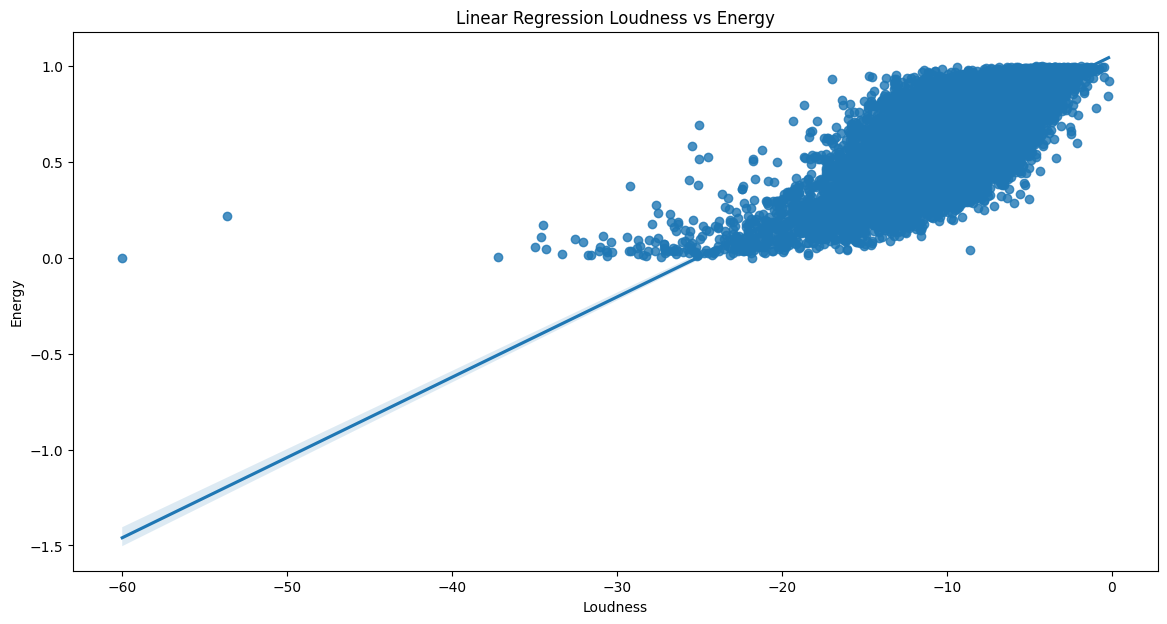

In [12]:
create_regplot(df, "Loudness", "Energy", "Linear Regression Loudness vs Energy")

Możemy zaobserwować to co wyżej zapisaliśmy we wnioskach

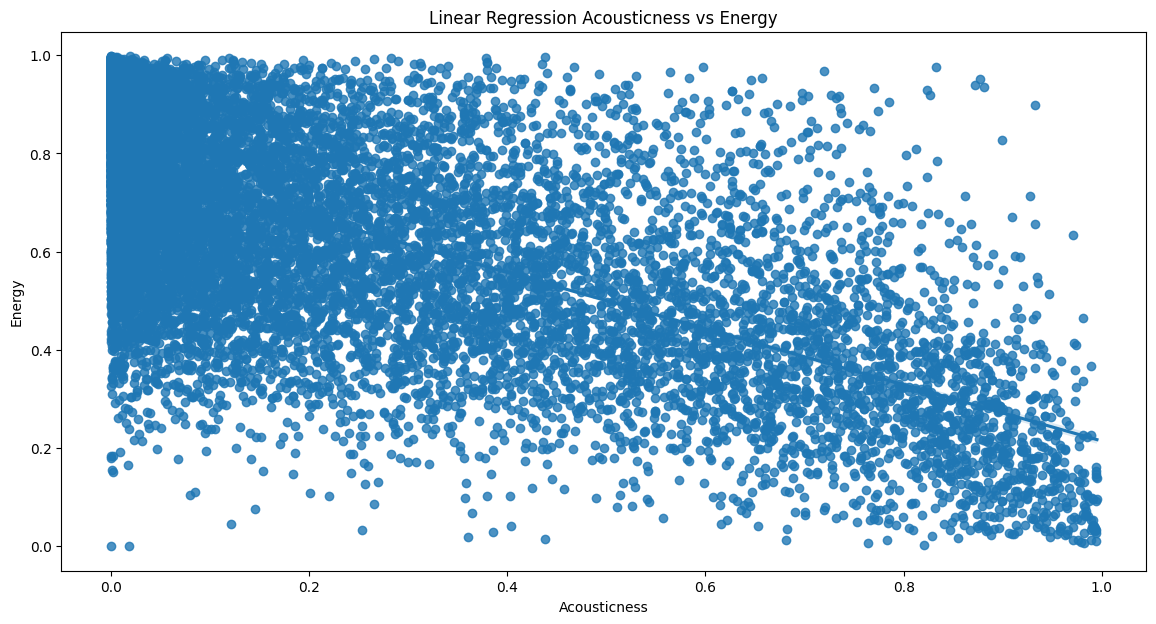

In [13]:
create_regplot(df, "Acousticness", "Energy", "Linear Regression Acousticness vs Energy")

Widzimy trend spadkowy, im bardziej utwór akustyczny tym mniejsza energia.

## 6. Wnioski końcowe
- Nierównomierny rozkład – Liczba wystąpień dla różnych wartości „Key” jest bardzo zróżnicowana. Niektóre wartości pojawiają się dużo częściej niż inne, co może oznaczać, że pewne kategorie są nadreprezentowane w zbiorze danych. Jest to logiczne, ponieważ niektóre klucze cieszą się większą popularnościa w muzyce od innych
- Energetyczne utwory są głośniejsze, ale mniej akustyczne
- Taneczność i pogodność mają umiarkowany wpływ na siebie
- Popularność utworu nie jest bezpośrednio zależna od cech muzycznych, oznacza to, że w muzyce rockowej ciężko o stworzenie piosenki, która będzie gwarantowanym hitem (w przeciwieństwie do niektórych gatunków muzycznych)


## 7. Zastosowania
- Twórcy muzyczni mogą wykorzystać te informacje do komponowania piosenek – jeśli chcą stworzyć dynamiczny utwór, powinni zwiększyć energię i głośność, a unikać elementów akustycznych.
- Analiza trendów muzycznych może pomóc w zrozumieniu, jakie cechy utworów sprzyjają sukcesowi na platformach streamingowych.
- Systemy rekomendacji muzyki mogą wykorzystywać korelacje, aby lepiej dopasować utwory do gustu użytkowników.





# Etap 2 

## 2.1. Wczytywanie danych

In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv("UltimateClassicRock.csv")
df['Decade'] = (df['Year'] // 10) * 10
df['Decade'] = df['Decade'].astype(str) + 's'
order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['Decade'] = pd.Categorical(df['Decade'], categories=order, ordered=True)


def convert_duration(duration):
    minutes, seconds = map(int, duration.split(':'))
    return minutes * 60 + seconds

df['Duration'] = df['Duration'].apply(convert_duration)

In [16]:
df.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Decade
0,Play A Simple Song,38 Special,38 Special,1977,193,4,0.521,0.367,0,-13.866,1,0.0278,0.6920,0.000003,0.1080,0.789,83.412,16,1970s
1,Four Wheels,38 Special,38 Special,1977,283,4,0.535,0.710,2,-12.287,1,0.0428,0.0100,0.023000,0.0495,0.445,160.361,10,1970s
2,Fly Away,38 Special,38 Special,1977,313,4,0.563,0.563,2,-10.781,1,0.0263,0.0357,0.001850,0.1400,0.564,106.739,13,1970s
3,Tell Everybody,38 Special,38 Special,1977,249,4,0.638,0.694,11,-10.206,0,0.0310,0.1610,0.000034,0.0908,0.936,124.962,10,1970s
4,Just Wanna Rock & Roll,38 Special,38 Special,1977,357,4,0.388,0.701,2,-9.984,1,0.0360,0.0130,0.042200,0.1150,0.769,126.769,11,1970s


In [17]:
A = df.drop(['Track', 'Artist', 'Album', 'Year', 'Energy'], axis=1)
b = df['Energy']
A.head()

,Duration,Time_Signature,Danceability,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Decade
0,193,4,0.521,0,-13.866,1,0.0278,0.6920,0.000003,0.1080,0.789,83.412,16,1970s
1,283,4,0.535,2,-12.287,1,0.0428,0.0100,0.023000,0.0495,0.445,160.361,10,1970s
2,313,4,0.563,2,-10.781,1,0.0263,0.0357,0.001850,0.1400,0.564,106.739,13,1970s
3,249,4,0.638,11,-10.206,0,0.0310,0.1610,0.000034,0.0908,0.936,124.962,10,1970s
4,357,4,0.388,2,-9.984,1,0.0360,0.0130,0.042200,0.1150,0.769,126.769,11,1970s


## 2.2. Pipeline, Column Transformer, Preprocessing

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split# pipeline for numerical attr: fills missing values with the mean and scales the data

In [19]:
#A - attributes dataset
#b - target 
# dedicate 10% of data to testing, and shuffle to randomize
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, shuffle=True)

num_attributes = [
    "Duration", 
    "Danceability", 
    "Key", 
    "Loudness", 
    "Speechiness", 
    "Acousticness", 
    "Instrumentalness", 
    "Liveness", 
    "Valence",
    "Tempo",
    "Popularity"
]

cat_attributes = ["Key", "Mode", "Decade"]

In [20]:
num_pipeline = Pipeline(
    [
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ],
    verbose = True
)

In [21]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")), 
])

In [22]:
preprocessing = ColumnTransformer([
    ("numerical", num_pipeline, num_attributes),   
    ("categorical", cat_pipeline, cat_attributes),  
])

In [23]:
A_train_preprocess = preprocessing.fit_transform(A_train)
A_test_preprocess = preprocessing.fit_transform(A_test)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing scaler, total=   0.0s


## 2.3. Linear Regression, Decision Tree, SVM

#### 2.3.1 Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_regression = LinearRegression()
linear_regression.fit(A_train_preprocess, b_train)
print("Coefficients:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)

Coefficients: [ 0.00421762 -0.02019742  0.00046439  0.13114296  0.03402048 -0.0700096
  0.01942307  0.01936379  0.05331823  0.00423302 -0.00018464 -0.00697121
  0.00613058  0.00248304  0.00240946  0.00318055 -0.01000611 -0.00177434
 -0.00356592  0.0072008   0.00921875 -0.00700533 -0.00130024  0.00261316
 -0.00261316 -0.01993078 -0.00870714  0.0324105   0.01233018 -0.00751152
  0.00180232 -0.01039356]
Intercept: 0.6537445850861705


#### 2.3.2 Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
tree_regressor = DecisionTreeRegressor(max_depth=2)
tree_regressor.fit(A_train_preprocess, b_train)

DecisionTreeRegressor(max_depth=2)

In [28]:
print("Tree structure:")
print(tree_regressor)

from sklearn.tree import export_text
feature_names = [f'Feature_{i}' for i in range(A_train_preprocess.shape[1])]
tree_rules = export_text(tree_regressor, feature_names=feature_names)
print("\nTree structure in text form:")
print(tree_rules)

Tree structure:
DecisionTreeRegressor(max_depth=2)

Tree structure in text form:
|--- Feature_3 <= -0.21
|   |--- Feature_5 <= 0.56
|   |   |--- value: [0.57]
|   |--- Feature_5 >  0.56
|   |   |--- value: [0.34]
|--- Feature_3 >  -0.21
|   |--- Feature_4 <= -0.28
|   |   |--- value: [0.67]
|   |--- Feature_4 >  -0.28
|   |   |--- value: [0.84]



#### 2.3.3 SVM

In [29]:
from sklearn.svm import LinearSVR

In [30]:
svm_regressor = LinearSVR(epsilon=0.5)
svm_regressor.fit(A_train_preprocess, b_train)

LinearSVR(epsilon=0.5)

## 2.4 Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

#### 2.4.1 Linear Regression

In [32]:
b_pred_lin = linear_regression.predict(A_test_preprocess)

mse_lin = mean_squared_error(b_test, b_pred_lin)  # Mean Squared Error
r2_lin = r2_score(b_test, b_pred_lin)  # R2 score

print("\nLinear Regression:")
print(f"Mean Squared Error: {mse_lin}")
print(f"R^2 score: {r2_lin}")


Linear Regression:
Mean Squared Error: 0.011657175714263782
R^2 score: 0.7846277088490796


#### 2.4.2 Decision Tree

In [33]:
b_pred_tree = tree_regressor.predict(A_test_preprocess)

mse_tree = mean_squared_error(b_test, b_pred_tree)  # Mean Squared Error
r2_tree = r2_score(b_test, b_pred_tree)  # R2 score

print("\nDecision Tree:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R^2 score: {r2_tree}")


Decision Tree:
Mean Squared Error: 0.023576144171469613
R^2 score: 0.5644186627039696


#### 2.4.3 SVM

In [34]:
b_pred_svm = svm_regressor.predict(A_test_preprocess)

mse_svm = mean_squared_error(b_test, b_pred_svm)  # Mean Squared Error
r2_svm = r2_score(b_test, b_pred_svm)  # R2 score

print("\nSVR:")
print(f"Mean Squared Error: {mse_svm}")
print(f"R^2 score: {r2_svm}")


SVR:
Mean Squared Error: 0.07356027780693443
R^2 score: -0.359063803901684


## 2.5 Implementacja Regresji Liniowej w NumPy 

#### 2.5.1 Rozwiązanie analityczne regresji liniowej



Rozwiązanie analityczne regresji liniowej wyraża się następującym wzorem:
$$
\theta_{\text{best}} = (X^T X)^{-1} X^T y
$$



In [35]:
theta_best = np.linalg.inv(A_train_preprocess.T @ A_train_preprocess) @ A_train_preprocess.T @ b_train
theta_best

array([ 1.78119640e-03, -4.56330021e-02,  9.79582437e+13,  1.56896414e-01,
        5.81762577e-02, -8.28806545e-02,  2.75710331e-02,  1.07676570e-02,
        5.44792752e-02, -6.25841630e-03,  8.93982301e-04,  1.44641248e+14,
        1.16702271e+14,  8.87632952e+13,  6.08243189e+13,  3.28853426e+13,
        4.94636636e+12, -2.29926099e+13, -5.09315862e+13, -7.88705625e+13,
       -1.06809539e+14, -1.34748515e+14, -1.62687491e+14,  3.49455644e-01,
        5.29324822e-01,  3.54730284e-01,  3.90993911e-01,  5.54778768e-01,
        3.72013687e-01,  5.33388126e-01,  5.57802731e-01,  4.57154089e-01])

In [36]:
b_predict = A_test_preprocess @ theta_best
b_predict

array([1.32762654e+12, 1.56092751e+12, 1.44427703e+12, ...,
       1.09432558e+12, 1.67757799e+12, 1.56092751e+12], shape=(2884,))

In [37]:
mse_manual = mean_squared_error(b_test, b_predict)
r2_manual = r2_score(b_test, b_predict)

print("Manual Linear Regression (Closed-form solution):")
print(f"  Mean Squared Error: {mse_manual}")
print(f"  R^2 score: {r2_manual}")

print("scikit-learn LinearRegression:")
print(f"  Mean Squared Error: {mse_lin}")
print(f"  R^2 score: {r2_lin}")

Manual Linear Regression (Closed-form solution):
  Mean Squared Error: 2.2940966845684708e+24
  R^2 score: -4.238461109174814e+25
scikit-learn LinearRegression:
  Mean Squared Error: 0.011657175714263782
  R^2 score: 0.7846277088490796


#### 2.5.2 Implementacja regresji liniowej za pomocą gradientu

In [38]:
from utils.linear_regression import gradient_descent, add_intercept

In [39]:
A_train_with_intercept = add_intercept(A_train_preprocess)  
theta = np.zeros(A_train_with_intercept.shape[1])  
learning_rate = 0.1  
iterations = 10  
batch_size = 2  


theta, cost_history = gradient_descent(A_train_with_intercept, b_train, theta, learning_rate, iterations, batch_size)


print("Optimal theta:", theta)
print("MSE:", cost_history[-1])

Optimal theta: [ 0.44174472  0.04493866 -0.01441719  0.05096762  0.18365668 -0.21215699
 -0.07192499 -0.00670577 -0.12349814  0.09333479 -0.03627154  0.07243336
 -0.19092279  0.64185408 -0.07204443  0.01992942 -0.12952146 -0.15938939
 -0.15020164 -0.05582583  0.39669893  0.00710846  0.19711968 -0.0630603
  0.20960985  0.23213486 -0.01368765  0.02647159 -0.07299995 -0.067063
  0.05832314  0.01187656  0.49882403]
MSE: 0.08652973912274481


In [40]:
print("scikit-learn LinearRegression:")
print(f"  Mean Squared Error: {mse_lin}")

scikit-learn LinearRegression:
  Mean Squared Error: 0.011657175714263782


## Etap 3

---

## 3.1 Predykcja energii (Energy) – Zadanie regresji

### 3.1.1. Studium ablacyjne (Ablation Study)

| Model                                  | Technika optymalizacji                         | MSE (średni koszt) |
|---------------------------------------|------------------------------------------------|--------------------|
| Model bazowy (LinearRegressionGD)     | Brak regularyzacji                             | 0.0124             |
| Model z regularyzacją L2              | Regularyzacja L2 (λ=0.1)                        | ~0.0122            |
| Model z regularyzacją L1              | Regularyzacja L1 (λ=0.1)                        | ~0.0119            |
| Model z cechami wielomianowymi        | Dodane cechy wielomianowe (stopień 2)          | Lepsza zbieżność   |
| Model z redukcją cech                 | Ograniczenie do 4 cech                         | Gorsza zbieżność   |

---

### 3.1.2 Opis najlepszego modelu

Najlepsze wyniki w zadaniu regresji uzyskał model z:
- **Regularyzacją L1** – najniższy średni błąd MSE
- **Cechami wielomianowymi** – poprawiona zbieżność

Kombinacja tych technik pomaga w lepszym dopasowaniu do danych bez nadmiernego przeuczenia.

---

### 3.1.3. Wyniki cząstkowe – Energy

#### a. Walidacja krzyżowa

| Fold | Koszt walidacji (MSE) |
|------|------------------------|
| 1    | 0.006208               |
| 2    | 0.006388               |
| 3    | 0.005901               |
| **Średni** | **0.00617**        |

#### b. Wykresy zbieżności

In [44]:

A.head()

,Duration,Time_Signature,Danceability,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Decade
0,193,4,0.521,0,-13.866,1,0.0278,0.6920,0.000003,0.1080,0.789,83.412,16,1970s
1,283,4,0.535,2,-12.287,1,0.0428,0.0100,0.023000,0.0495,0.445,160.361,10,1970s
2,313,4,0.563,2,-10.781,1,0.0263,0.0357,0.001850,0.1400,0.564,106.739,13,1970s
3,249,4,0.638,11,-10.206,0,0.0310,0.1610,0.000034,0.0908,0.936,124.962,10,1970s
4,357,4,0.388,2,-9.984,1,0.0360,0.0130,0.042200,0.1150,0.769,126.769,11,1970s


In [41]:
from sklearn.model_selection import train_test_split
from utils.linear_regressionGD import LinearRegressionGD

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegressionGD(learning_rate=0.001, iterations=100, batch_size=32)
model.fit(A_train, b_train, A_test, b_test)
predictions = model.predict(A_test)

import matplotlib.pyplot as plt

plt.plot(model.cost_history_train, label='Training cost')
if model.cost_history_val:
    plt.plot(model.cost_history_val, label='Validation cost')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Convergence of cost function')
plt.legend()
plt.show()

KeyError: "['Decade'] not found in axis"

- **Model bazowy** – regularna zbieżność.
- **Z cechami wielomianowymi** – szybsza, niższa zbieżność.
- **Po redukcji cech** – gorsze dopasowanie.

#### c. Regularyzacja

| Typ regularyzacji | Średnia wag | Wnioski               |
|-------------------|-------------|------------------------|
| Brak              | 0.073259    | Wszystkie cechy aktywne |
| L2 (Ridge)        | 0.073135    | Mniejsze wartości wag   |
| L1 (Lasso)        | 0.069059    | Część wag ≈ 0   |

---

## 3.2. Predykcja trybu (Mode) – Zadanie klasyfikacji

### 3.2.1. Balansowanie danych

| Metoda        | Liczność klas po przetworzeniu |
|---------------|--------------------------------|
| Oryginalne    | 1: 10527, 0: 3891               |
| SMOTE         | 1: 8421, 0: 8421                |
| Undersampling | 1: 3891, 0: 3891              |

Zbalansowanie klas poprawia wykrywanie klasy mniejszościowej (0).

---

### 3.2.2. Wyniki klasyfikacji – porównanie

| Zbiór                | Precision (0) | Recall (0) | F1 (0) | Wnioski                              |
|----------------------|---------------|------------|--------|---------------------------------------|
| Oryginalny           | Niska         | Bardzo niska | Niska  | Model uprzywilejowuje klasę 1         |
| SMOTE                | Lepsza        | Dobra       | Średnia| Poprawa dla klasy 0, spadek dla 1     |
| Undersampling        | Zrównoważona  | Dobra       | Lepsza | Lepsze F1 dla klasy 0, ogólny balans  |

---

### 3.2.3. Strojenie hiperparametrów (GridSearchCV)

#### a. DecisionTreeClassifier

**Najlepsze parametry:**
```python
{
  'max_depth': 10,
  'min_samples_split': 5,
  'min_samples_leaf': 2
}
```

**Wyniki (DecisionTree):**
- F1-score (średni): **0.71**
- Model dobrze dopasowany, bez nadmiernej złożoności.

#### b. KNeighborsClassifier

**Najlepsze parametry:**
```python
{
  'n_neighbors': 5,
  'weights': 'distance',
  'metric': 'manhattan'
}
```

**Wyniki (KNN):**
- F1-score: **0.68**
- Słabszy niż drzewo decyzyjne, wrażliwy na skalowanie.

---

### 3.2.4. Porównanie modeli klasyfikacyjnych

| Model                  | F1-score |
|------------------------|----------|
| DecisionTreeClassifier | **0.71** |
| KNeighborsClassifier   | 0.68     |

**DecisionTree** był najlepszym modelem klasyfikacyjnym dzięki:
- Optymalnym parametrom,
- Tolerancji na nieliniowość,
- Lepszej interpretowalności.

---

## 3.3 Podsumowanie

| Zadanie       | Target  | Typ          | Najlepszy model          | Metryka      | Wynik     |
|---------------|---------|---------------|---------------------------|--------------|-----------|
| Regresja      | Energy  | LinearRegressionGD | L1 + cechy wielomianowe  | MSE          | ~0.0062   |
| Klasyfikacja  | Mode    | DecisionTreeClassifier | GridSearch + balansowanie | F1-score     | 0.71      |